<a href="https://colab.research.google.com/github/momijizen/Machine-Learning-with-Python-Projects/blob/main/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 408.3MB 41kB/s 
     |████████████████████████████████| 4.0MB 39.5MB/s 
     |████████████████████████████████| 5.9MB 43.9MB/s 
     |████████████████████████████████| 471kB 48.0MB/s 
     |████████████████████████████████| 4.0MB 39.3MB/s 
     |████████████████████████████████| 3.8MB 44.6MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-02-19 04:20:52--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv          [ <=>                ] 349.84K  --.-KB/s    in 0.02s   

2021-02-19 04:20:52 (14.1 MB/s) - ‘train-data.tsv’ saved [358233]

--2021-02-19 04:20:52--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv          [ <=>                ]

In [ ]:
df_train = pd.read_csv(train_file_path, sep='\t')
df_train.columns  =  ['tags','messages']
df_train

,tags,messages
0,ham,you can never do nothing
1,ham,"now u sound like manky scouse boy steve,like! ..."
2,ham,mum say we wan to go then go... then she can s...
3,ham,never y lei... i v lazy... got wat? dat day ü ...
4,ham,in xam hall boy asked girl tell me the startin...
...,...,...
4173,ham,just woke up. yeesh its late. but i didn't fal...
4174,ham,what do u reckon as need 2 arrange transport i...
4175,spam,free entry into our £250 weekly competition ju...
4176,spam,-pls stop bootydelious (32/f) is inviting you ...


In [ ]:
df_train['tags'] = pd.Categorical(df_train['tags'])
df_train['tags'] = df_train.tags.cat.codes
df_train

,tags,messages
0,0,you can never do nothing
1,0,"now u sound like manky scouse boy steve,like! ..."
2,0,mum say we wan to go then go... then she can s...
3,0,never y lei... i v lazy... got wat? dat day ü ...
4,0,in xam hall boy asked girl tell me the startin...
...,...,...
4173,0,just woke up. yeesh its late. but i didn't fal...
4174,0,what do u reckon as need 2 arrange transport i...
4175,1,free entry into our £250 weekly competition ju...
4176,1,-pls stop bootydelious (32/f) is inviting you ...


In [ ]:
df_test = pd.read_csv(test_file_path, sep='\t')
df_test.columns = ['tags','messages']
df_test

,tags,messages
0,ham,"not much, just some textin'. how bout you?"
1,ham,i probably won't eat at all today. i think i'm...
2,ham,don‘t give a flying monkeys wot they think and...
3,ham,who are you seeing?
4,ham,your opinion about me? 1. over 2. jada 3. kusr...
...,...,...
1386,ham,true dear..i sat to pray evening and felt so.s...
1387,ham,"what will we do in the shower, baby?"
1388,ham,where are you ? what are you doing ? are yuou ...
1389,spam,ur cash-balance is currently 500 pounds - to m...


In [ ]:
df_test['tags'] = pd.Categorical(df_test['tags'])
df_test['tags'] = df_test.tags.cat.codes
df_test

,tags,messages
0,0,"not much, just some textin'. how bout you?"
1,0,i probably won't eat at all today. i think i'm...
2,0,don‘t give a flying monkeys wot they think and...
3,0,who are you seeing?
4,0,your opinion about me? 1. over 2. jada 3. kusr...
...,...,...
1386,0,true dear..i sat to pray evening and felt so.s...
1387,0,"what will we do in the shower, baby?"
1388,0,where are you ? what are you doing ? are yuou ...
1389,1,ur cash-balance is currently 500 pounds - to m...


In [ ]:
train_target = df_train.pop('tags')
test_target = df_test.pop('tags')

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((df_train.values, train_target.values))
test_dataset = tf.data.Dataset.from_tensor_slices((df_test.values, test_target.values))

In [ ]:
for example, label in train_dataset.take(6):
  print('messages: ', example.numpy())
  print('tags: ', label.numpy())

messages:  [b'you can never do nothing']
tags:  0
messages:  [b'now u sound like manky scouse boy steve,like! i is travelling on da bus home.wot has u inmind 4 recreation dis eve?']
tags:  0
messages:  [b'mum say we wan to go then go... then she can shun bian watch da glass exhibition...']
tags:  0
messages:  [b'never y lei... i v lazy... got wat? dat day \xc3\xbc send me da url cant work one...']
tags:  0
messages:  [b'in xam hall boy asked girl tell me the starting term for dis answer i can den manage on my own after lot of hesitation n lookin around silently she said the! intha ponnungale ipaditan;)']
tags:  0
messages:  [b"genius what's up. how your brother. pls send his number to my skype."]
tags:  0


In [ ]:
for example, label in test_dataset.take(6):
  print('messages: ', example.numpy())
  print('tags: ', label.numpy())

messages:  [b"not much, just some textin'. how bout you?"]
tags:  0
messages:  [b"i probably won't eat at all today. i think i'm gonna pop. how was your weekend? did u miss me?"]
tags:  0
messages:  [b'don\xe2\x80\x98t give a flying monkeys wot they think and i certainly don\xe2\x80\x98t mind. any friend of mine and all that!']
tags:  0
messages:  [b'who are you seeing?']
tags:  0
messages:  [b'your opinion about me? 1. over 2. jada 3. kusruthi 4. lovable 5. silent 6. spl character 7. not matured 8. stylish 9. simple pls reply..']
tags:  0
messages:  [b'yesterday its with me only . now am going home.']
tags:  0


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('messages: ', example.numpy()[:3])
  print()
  print('tags: ', label.numpy()[:3])

messages:  [[b'well then you have a great weekend!']
 [b"have you heard about that job? i'm going to that wildlife talk again tonight if u want2come. its that2worzels and a wizzle or whatever it is?!"]
 [b'oops. 4 got that bit.']]

tags:  [0 0 0]


In [ ]:
# Create the text encoder
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:100]

array(['', '[UNK]', 'to', 'i', 'you', 'a', 'the', 'u', 'and', 'in', 'is',
       'me', 'my', 'for', 'your', 'of', 'it', 'call', 'have', 'on',
       'that', 'are', 'now', 'im', '2', 'not', 'but', 'so', 'at', 'or',
       'do', 'can', 'with', 'be', 'will', 'if', 'get', 'ur', 'just', 'we',
       'this', 'no', 'its', 'up', 'go', '4', 'ok', 'dont', 'ltgt', 'free',
       'when', 'out', 'how', 'all', 'what', 'from', 'know', 'like', 'got',
       'then', 'come', 'good', 'ill', 'time', 'am', 'was', 'only', 'day',
       'he', 'love', 'send', 'there', 'as', 'want', 'text', 'going', 'by',
       'ü', 'one', 'need', 'about', 'txt', 'lor', 'still', 'our', 'see',
       'n', 'r', 'home', 'stop', 'sorry', 'reply', 'back', 'today',
       'tell', 'she', 'new', 'been', 'mobile', 'later'], dtype='<U15')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[105,  59,   4,  18,   5, 127, 392,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [ 18,   4,   1,  80,  20, 369,  23,  75,   2,  20,   1, 270, 178,
        195,  35,   7,   1,  42,   1,   8,   5,   1,  29, 611,  16,  10,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [953,  45,  58,  20, 275,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  [b'well then you have a great weekend!']
Round-trip:  well then you have a great weekend                                                                 

Original:  [b"have you heard about that job? i'm going to that wildlife talk again tonight if u want2come. its that2worzels and a wizzle or whatever it is?!"]
Round-trip:  have you [UNK] about that job im going to that [UNK] talk again tonight if u [UNK] its [UNK] and a [UNK] or whatever it is                                              

Original:  [b'oops. 4 got that bit.']
Round-trip:  oops 4 got that bit                                                                   



In [ ]:
# Create the model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=12)


Epoch 1/10
66/66 [==============================] - 34s 280ms/step - loss: 0.6829 - accuracy: 0.8532 - val_loss: 0.6212 - val_accuracy: 0.8633
Epoch 2/10
66/66 [==============================] - 13s 197ms/step - loss: 0.5774 - accuracy: 0.8641 - val_loss: 0.4666 - val_accuracy: 0.8633
Epoch 3/10
66/66 [==============================] - 13s 200ms/step - loss: 0.4289 - accuracy: 0.8739 - val_loss: 0.3284 - val_accuracy: 0.8633
Epoch 4/10
66/66 [==============================] - 13s 197ms/step - loss: 0.2907 - accuracy: 0.8619 - val_loss: 0.1730 - val_accuracy: 0.8685
Epoch 5/10
66/66 [==============================] - 13s 199ms/step - loss: 0.1550 - accuracy: 0.9203 - val_loss: 0.1098 - val_accuracy: 0.9701
Epoch 6/10
66/66 [==============================] - 13s 204ms/step - loss: 0.0964 - accuracy: 0.9820 - val_loss: 0.0869 - val_accuracy: 0.9753
Epoch 7/10
66/66 [==============================] - 13s 202ms/step - loss: 0.0693 - accuracy: 0.9848 - val_loss: 0.0696 - val_accuracy: 0.9831

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

22/22 [==============================] - 1s 53ms/step - loss: 0.0562 - accuracy: 0.9863
Test Loss: 0.05617307126522064
Test Accuracy: 0.9863407611846924


In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

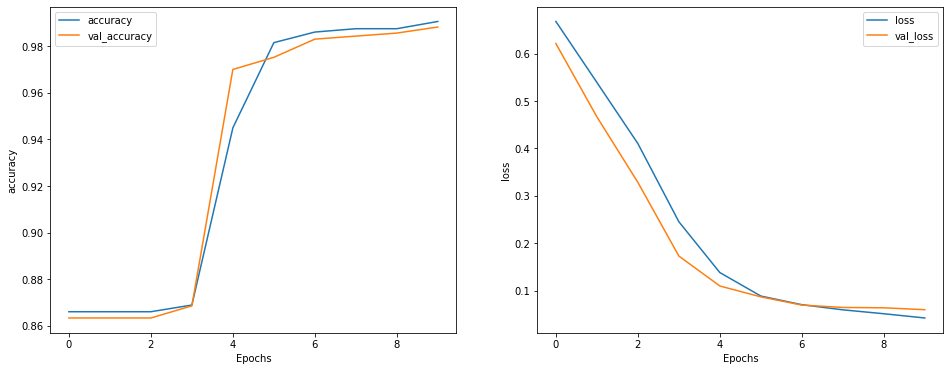

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):

  prediction = []
  pred = model.predict(np.array([pred_text]))
  pred = pred[0,0]

  if pred >= 0 :
    prediction = [pred, 'spam']
  else :
    prediction = [pred, 'ham']

  return (prediction)


pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[-5.814967, 'ham']


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
